In [1]:
# for cleaning up after tests
import os
dir = "../calibrate/stacks/"
for f in os.listdir(dir):
    if ".bin" in f:
        os.remove(os.path.join(dir, f))

In [2]:
# setup the dirs and things
import os
from dataclasses import dataclass

@dataclass
class Dir:
    path: str
    date: str
    bag: str = None
    clicks: str = None
root = "../calibrate"
data_dirs = []
dir_files = Dir(root, "test")
dir_files.bag = os.path.join(root, "rtk-co-locate.bag")
dir_files.clicks = os.path.join(root, "rtk-co-locate-click.csv")
data_dirs.append(dir_files)

In [3]:
# %load_ext autoreload
# %autoreload 2
import rospy
from banners import *
import pdb 
from cv_bridge import CvBridge
from sensor_msgs.msg import Image

bridge = CvBridge()
# from csv_relations import *
# import csv_relations

def done(fname, obj):
    with open(fname, 'wb') as f:
        pickle.dump(obj, f, protocol=2)

# get all dirs with data and order by date
'''
data_dirs = []
for dd in os.listdir(root):
    d = os.path.join(root, dd)
    print(d)
    if os.path.isdir(d):
        dir_files = Dir(d, dd)
        for f in os.listdir(d):
            if ".bag" in f:
                dir_files.bag = os.path.join(d, f)
            if ".csv" in f:
                dir_files.clicks = os.path.join(d, f)
        data_dirs.append(dir_files)
'''
print(data_dirs)

TOPICS = ['/current_pose', '/cam0/nv12_decode_result', '/cam1/nv12_decode_result', '/therm/image_raw_throttle']
cc = CameraCombo()
i = 0
# process each bag
for a in data_dirs:
    
    bag = rosbag.Bag(a.bag)
    for topic, msg, t in bag.read_messages(TOPICS):
        cc.dir = a
        # stack 3 images together
        if topic == '/therm/image_raw_throttle':
            # print("thermal")
            cc.flir = msg
            
        if topic == '/cam0/nv12_decode_result':
            # print("rgb")
            cc.rgb = msg

        if topic == '/cam1/nv12_decode_result':
            # print("noir")
            cc.noir = msg
        if topic == "/current_pose":
            # print("stacking")
            cc.pose = msg
            # print(cc.pose)
            cc.stack(t)
            
            
    # processed_data.append(cc)
    cc.done()

[Dir(path='../calibrate', date='test', bag='../calibrate/rtk-co-locate.bag', clicks='../calibrate/rtk-co-locate-click.csv')]
dumping stack
did a pose thing
[[ 1.11475454e-01 -9.93766426e-01  1.23006829e-03  5.83803042e+05]
 [ 9.93719859e-01  1.11457980e-01 -9.89750309e-03  4.09051137e+06]
 [ 9.69870534e-03  2.32567194e-03  9.99950262e-01  2.06330538e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
added to parsed
dumping stack
did a pose thing
[[ 1.11510220e-01 -9.93762533e-01  1.22450919e-03  5.83803051e+05]
 [ 9.93715958e-01  1.11492799e-01 -9.89702455e-03  4.09051137e+06]
 [ 9.69876823e-03  2.32043370e-03  9.99950274e-01  2.13318646e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
added to parsed
dumping stack
did a pose thing
[[ 1.12388627e-01 -9.93663605e-01  1.19855017e-03  5.83803051e+05]
 [ 9.93617087e-01  1.12371440e-01 -9.88653232e-03  4.09051137e+06]
 [ 9.68920454e-03  2.30203372e-03  9.99950409e-01  2.17323482e-01]
 [ 0.000000

In [4]:
%reload_ext autoreload
%autoreload 2
import csv_relations


proc_click = []

origin = None

data_dirs[0].clicks = '../calibrate/rtk-co-locate-click.csv'

# go over the CSVs
for a in data_dirs:
    C = csv_relations.CSVAugmented(a.clicks, a.path)
    C.csv_read()
    C.done()
    proc_click.append(C)

In [5]:
p = proc_click[0]
print(p.click_data)
print(cc.parsed)

               x             y  health
0  583795.957302  4.090515e+06     1.0
                                                  pose  \
0    [[0.11147545441146262, -0.9937664262772069, 0....   
1    [[0.11151021975161624, -0.993762532735159, 0.0...   
2    [[0.11238862669140737, -0.9936636050836818, 0....   
3    [[0.11309562335101897, -0.9935834301131327, 0....   
4    [[0.11388846840112632, -0.9934929006828752, 0....   
..                                                 ...   
679  [[0.11864259140935357, -0.9928781754365038, -0...   
680  [[0.1179720822385033, -0.9929582371500308, -0....   
681  [[0.1179424361710677, -0.9929617369329357, -0....   
682  [[0.11845608835116062, -0.992900829342249, -0....   
683  [[0.11858095328014673, -0.9928859283845451, -0...   

                                              save_loc  
0    ../calibrate/stacks/stacked_1676934048.7934440...  
1    ../calibrate/stacks/stacked_1676934049.1670752...  
2    ../calibrate/stacks/stacked_1676934049.2271923...

In [6]:
%reload_ext autoreload
%autoreload 2
import data_relater
from banners import *

relations = None

D = data_relater.Relater()
for a in data_dirs:
    D.cc.dir = a
    D.cc.uptake()
    relations = D.clicks_to_image(p, 30)
# D.cc.dir = 
# D.cc.uptake()
# D.clicks_to_image(p, 55)

[[ 0.30165596]
 [ 0.73867342]
 [-9.82894405]]
[[ 0.0299385 ]
 [ 0.89301314]
 [-9.79483402]]
[[-0.09797426]
 [ 0.86743255]
 [-9.80089695]]
[[-0.28688159]
 [ 0.69817265]
 [-9.77131646]]
[[-0.28688159]
 [ 0.69817265]
 [-9.77131646]]
[[-0.74920546]
 [ 0.56037387]
 [-9.82290406]]
[[-0.78305039]
 [ 0.6958678 ]
 [-9.84768255]]
[[-0.84003715]
 [ 0.72184306]
 [-9.86400757]]
[[  1.06645566]
 [ -0.18341051]
 [-10.04112059]]
[[  1.05076496]
 [ -0.19408697]
 [-10.00835586]]
[[ 0.93706554]
 [-0.2709454 ]
 [-9.98105644]]
[[ 0.72711981]
 [-0.1862481 ]
 [-9.9720331 ]]
[[ 0.14973045]
 [-0.23808767]
 [-9.81858608]]
[[ 0.15850442]
 [-0.29350775]
 [-9.81676994]]
[[ 0.08475689]
 [-0.3351589 ]
 [-9.81298676]]
[[-0.18217537]
 [-0.37366393]
 [-9.8077816 ]]
[[-0.30123138]
 [-0.35538971]
 [-9.80310423]]
[[-0.4590017 ]
 [-0.2386911 ]
 [-9.79235358]]
[[-0.61489146]
 [-0.2159608 ]
 [-9.77734382]]
[[-0.70370106]
 [-0.22662341]
 [-9.80977863]]
[[-0.92586048]
 [-0.25044535]
 [-9.7543811 ]]
[[-1.06282326]
 [-0.25666023

In [7]:
import matplotlib.pyplot as plt

rgb_K = np.array([[3328.72744368, 0.0, 985.2442405],
                  [0.0, 3318.46036526, 489.0953335],
                  [0, 0, 1]])
rgb_dist = np.array([-0.33986049, -0.49477998,  0.00326809, -0.00230553])

def pretty_image(df, idx):
    row = df.iloc[idx]
    with open(row['stack_location'], 'rb') as f:
        stack = pickle.load(f)
        
        rgb = bridge.imgmsg_to_cv2(stack['rgb'], desired_encoding='passthrough')
        print(rgb.shape)
        rgb = D.undistort(rgb, rgb_K, rgb_dist)
        rgb = cv2.flip(rgb, 0)
        # rgb = cv2.flip(rgb, 1)
        points = row['pixel_points']
        print(points[0].item(), points[1].item())
        rgb = cv2.circle(rgb, (int(points[0].item()), int(points[1].item())), 25, (0, 0, 255), 4)
        rgb = cv2.circle(rgb, (1920//2, 1080//2), 25, (255, 255, 255), 4)
        # rgb = cv2.circle(rgb, (1300, 200), 25, (0, 255, 255), 4)
        plt.imshow(rgb)

(1080, 1920, 3)
883.0836775850138 239.7034897241645


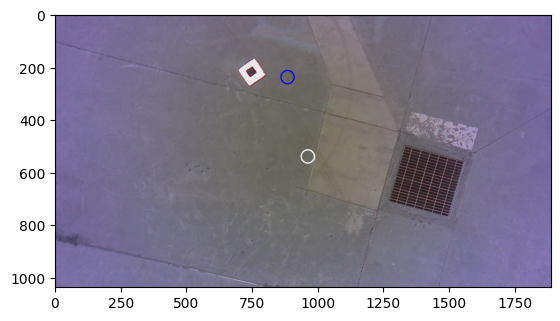

In [8]:
pretty_image(relations, 0)

(1080, 1920, 3)
975.0697834209407 186.54516081981603


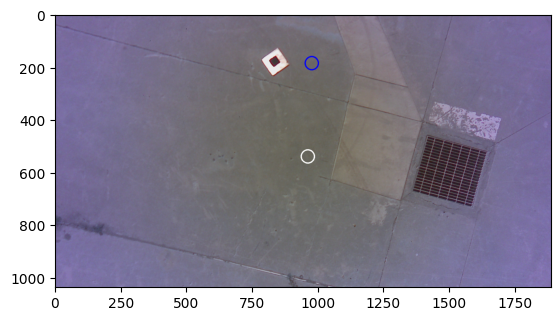

In [9]:
pretty_image(relations, 1)

(1080, 1920, 3)
1018.5197259815787 195.39358864394126


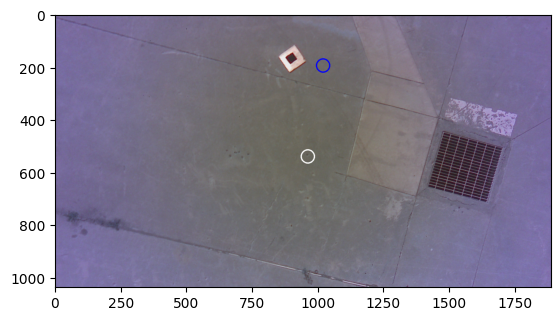

In [10]:
pretty_image(relations, 2)

(1080, 1920, 3)
1082.9742275476474 251.9872349075083


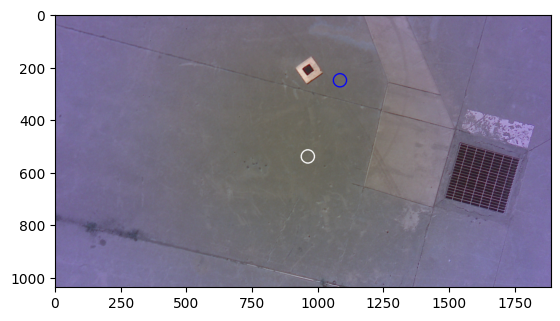

In [11]:
pretty_image(relations, 3)

(1080, 1920, 3)
1082.9742275476474 251.9872349075083


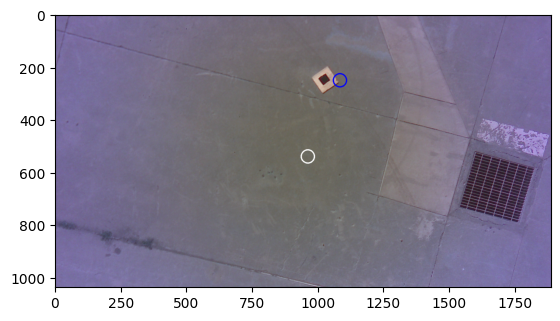

In [12]:
pretty_image(relations, 4)

(1080, 1920, 3)
1239.1305418778184 299.7848760017726


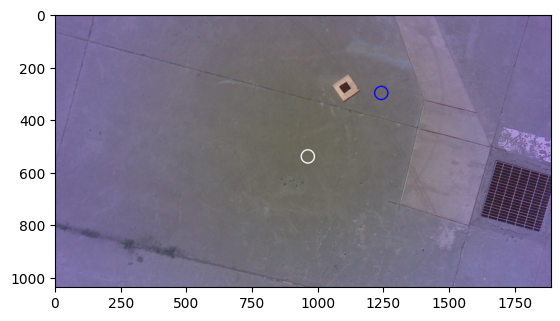

In [13]:
pretty_image(relations, 5)

In [14]:

def pretty_image_analyze(df, idx):
    row = df.iloc[idx]
    with open(row['stack_location'], 'rb') as f:
        stack = pickle.load(f)
        
        rgb = bridge.imgmsg_to_cv2(stack['rgb'], desired_encoding='passthrough')
        print(rgb.shape)
        rgb = D.undistort(rgb, rgb_K, rgb_dist)
        rgb = cv2.flip(rgb, 0)
        # rgb = cv2.flip(rgb, 1)
        points = row['pixel_points']
        print(points[0].item(), points[1].item())
        rgb = cv2.circle(rgb, (int(points[0].item()), int(points[1].item())), 25, (0, 0, 255), 4)
        rgb = cv2.circle(rgb, (1920//2, 1080//2), 25, (255, 255, 255), 4)
        cv2.imwrite(str(idx) + '_annotated.jpg', rgb)

for i in range(20):
    pretty_image_analyze(relations, i)

(1080, 1920, 3)
883.0836775850138 239.7034897241645
(1080, 1920, 3)
975.0697834209407 186.54516081981603
(1080, 1920, 3)
1018.5197259815787 195.39358864394126
(1080, 1920, 3)
1082.9742275476474 251.9872349075083
(1080, 1920, 3)
1082.9742275476474 251.9872349075083
(1080, 1920, 3)
1239.1305418778184 299.7848760017726
(1080, 1920, 3)
1249.932029161822 254.60262899773716
(1080, 1920, 3)
1268.7248329431918 246.25208997143676
(1080, 1920, 3)
631.703997219093 549.7101317828157
(1080, 1920, 3)
635.765244606587 553.4485532251313
(1080, 1920, 3)
672.7286456488044 579.1781409045875
(1080, 1920, 3)
742.5270677484518 551.0743632987085
(1080, 1920, 3)
934.4821584037913 569.5635898239971
(1080, 1920, 3)
931.4976406137931 588.3126772653984
(1080, 1920, 3)
956.4933028830565 602.4361073092782
(1080, 1920, 3)
1047.0739351187053 615.5244259817194
(1080, 1920, 3)
1087.5299187804571 609.39872352431
(1080, 1920, 3)
1141.2732821481272 569.9836465967713
(1080, 1920, 3)
1194.5859717200854 562.3930881061957
(10

In [15]:
import numpy as np
from scipy.spatial.transform import Rotation as R

offset = np.array([[0, 0, -1],
                   [0, 1, 0],
                   [1, 0, 0]])

rot = np.array([[-0.9980357590411305, -0.026915248451175815, 0.056570249036100764, 0.04695379334578927],
                [-0.027719723708970197, 0.9995247805856345, -0.013484432236392396, 0.08920999491195272],
                [-0.05618042891161776, -0.015026057235714922, -0.9983075563228277, -0.6942341602534792],
                [0.0, 0.0, 0.0, 1.0]])
m = R.from_matrix(np.array(rot[:3,:3]))
eul = m.as_euler('xyz', degrees=True)
print(eul)
# e = R.from_euler('xyz', [-90, 90, 0], degrees=True)
# rot2 = e.as_matrix()
# print(rot2)

[-179.13767591    3.22059715 -178.40906003]


In [16]:
# %matplotlib tk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

CLICK_FROM_IMGS = []

def onclick(event):
    ix, iy = event.xdata, event.ydata
    print(ix, iy)
    CLICK_FROM_IMGS.append([ix, iy])



In [ ]:
# put clicks and predictions together
CLICK_FROM_IMGS = [[744.9554838709678, 222.7283870967742], [835.092258064516, 183.75032258064516], [900.8677419354838, 171.56967741935478], [961.7709677419355, 222.7283870967742], [1022.6741935483872, 259.27032258064514], [1107.9387096774194, 283.6316129032257], [1139.608387096774, 281.19548387096756], [1142.0445161290322, 215.41999999999985], [425.8225806451612, 254.3980645161289], [445.31161290322575, 249.52580645161288], [462.36451612903227, 276.32322580645155], [523.2677419354839, 269.0148387096774], [779.0612903225806, 256.834193548387], [771.7529032258064, 290.9399999999998], [815.6032258064515, 305.55677419354834], [895.9954838709677, 307.99290322580646], [971.5154838709677, 283.6316129032257], [1010.4935483870968, 247.08967741935476], [1066.5245161290322, 237.3451612903225], [1081.1412903225805, 239.78129032258062], [1137.1722580645162, 242.21741935483874], [1217.5645161290322, 244.65354838709663], [1266.2870967741935, 244.65354838709663], [1322.318064516129, 249.52580645161288], [1383.2212903225807, 256.834193548387]]

parsed = cc.parsed

def try_things(offset, CLICKS):
    together_data = []
    for idx, row in parsed.iterrows():
        p = row['pose']
        pts = proc_click[0].get_pts(p, cc.visCone(p, 25))
        if len(pts.index):
            local = D.convert_to_local(offset@p, pts)
            pxs = D.fProject(local, rgb_K).squeeze()
            together_data.append([np.asarray(CLICKS.pop(0)), pxs])
            if len(CLICKS) == 0:
                return together_data

starting_point = np.array([ 2.10048283e-06, -4.94574211e-06,  4.76440439e-06, -3.75928753e-06, -2.53413590e-05,  2.99447057e-06])
sigma = 9e-7

slope = 0.05

error = 270.34439992544935

error_history = []

while error > 50:
    what_you_discovered = []

    # together_data = np.asarray(together_data)
    # tries = np.random.rand(50, 3) * 0.000001
    tries = np.random.uniform(-1*sigma, sigma, (100, 6)) + starting_point
    for row in tries:
        # print(row[3:])
        rot_offset = np.concatenate((R.from_euler('xyz', row[:3], degrees=True).as_matrix(), np.zeros((1,3))), axis=0)
        tra_offset = np.expand_dims(np.concatenate((row[3:], np.array([1])),axis=0).T, axis=1)
        offset = np.concatenate((rot_offset, tra_offset), axis=1)
        together_data = try_things(offset, CLICK_FROM_IMGS.copy())
        norms = []
        for r in together_data:
            norms.append(np.linalg.norm(r[0] - r[1], 2))
        what_you_discovered.append([row, norms])
        # print(norms)

    # find the orientation with lowest average norm
    lowest = None
    for item in what_you_discovered:
        if lowest == None:
            lowest = item
        else:
            if np.average(item[1]) < np.average(lowest[1]):
                lowest = item
    starting_point = lowest[0]
    # if np.average(lowest[1]) < sigma * 1e5 * error:
    #     sigma *= 0.1
    #     print("updating sigma to", sigma)
    error = np.average(lowest[1])
    error_history.append(error)
    if len(error_history) > 10:
        window = error_history[-10:]
        if max(window) - min(window) < slope:
            sigma *= 0.1
            slope *= 0.1
            print("gradient small: updating sigma to", sigma)
            error_history.clear()
    print(lowest, np.average(lowest[1]))

[array([ 1.22474306e-06, -4.90982504e-06,  4.31355053e-06, -3.31802311e-06,
       -2.44865530e-05,  3.04908799e-06]), [251.65967353694336, 249.31239652691025, 234.36951942607865, 239.6583841498284, 169.79951412295776, 243.41390506888908, 211.86695062406264, 242.34079686486086, 337.4039600605308, 341.1916413772458, 347.5782932650358, 332.2410095025851, 342.9429008868643, 328.9264589493719, 325.9078064031515, 338.64247271429315, 353.1390630250783, 350.29686750146055, 351.6818806130764, 354.00916874429083, 362.84682459054034, 358.1472931013347, 362.9440774748589, 371.88168899402973, 364.8266347127138]] 310.68116728947973
[array([ 3.26513328e-07, -4.24681061e-06,  4.41001938e-06, -3.90704623e-06,
       -2.39712602e-05,  3.80379838e-06]), [254.9533210686242, 253.18218551210975, 238.11976041961793, 243.78389554820967, 174.12714478182798, 248.53640942755925, 217.61287687890788, 247.77485706931807, 333.77517443380435, 337.94719597955935, 344.1377679437339, 328.7031217055896, 340.659989718083

KeyboardInterrupt: 

Analyze time to analyze data